We want to analize how different threshold for the LIF neurons affects the connectivity patterns.

We are going to take the results from simulations 13 (`vt = 0.25`), 14 (`vt = 0.5`) and 15 (`vt = 1`). All of them use a network with `N = 200` neurons and `p = 0.3`

Compare CC 

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib

In [47]:
# Configurar Matplotlib para usar STIX y un tamaño de fuente más grande
matplotlib.rcParams.update({
    "mathtext.fontset": "stix",
    "font.family": "STIXGeneral",
    "font.size": 14,  # Cambia este valor para ajustar el tamaño de fuente global
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

In [48]:
num_sims = [13, 14, 15, 16, 17]

def color_label (num_sim):
    if num_sim == 13:
        color = 'm'
        label = 'Vt = 0.25'
    if num_sim == 14:
        color = 'c'
        label = 'Vt = 0.5'
    if num_sim == 15:
        color = 'orange'
        label = 'Vt = 1'
    if num_sim == 16:
        color = 'greenyellow'
        label = 'Vt = 0.05'
    if num_sim == 17:
        color = 'firebrick'
        label = 'Vt = 0.15'
    return color, label



In [49]:
def csv_to_matrix(filename):
    df = pd.read_csv(filename, header=None) 
    matrix = df.values 
    return matrix

def cargar_archivo_parametros(filename_parametros):
    # Lee el archivo CSV
    df = pd.read_csv(filename_parametros)
    
    parametros = df.to_dict(orient='records')[0]
    
    # Retorna el diccionario de parámetros
    return parametros

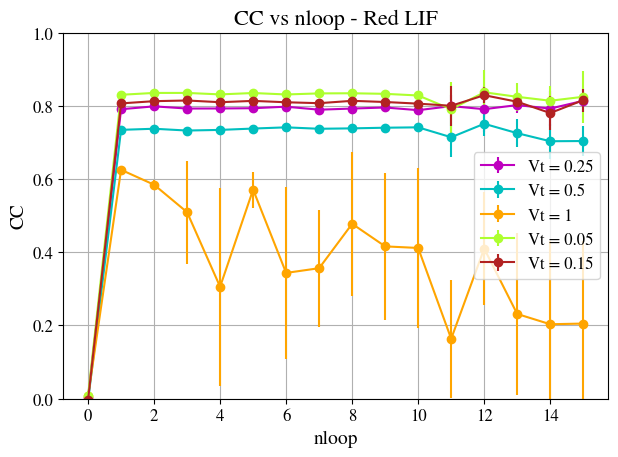

In [50]:
for num_sim in num_sims:

    nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)


    filename_parametros = f"simulacion_{num_sim}/simulacion_{num_sim}_parametros.csv"  # Reemplaza 'ruta/a/la/carpeta' con la ruta real de tu carpeta
    parametros = cargar_archivo_parametros(filename_parametros)


    data_pqif = data[data['pqif'] == 0]
    grouped_data = data_pqif.groupby(['nloop'])

    color, label = color_label(num_sim)

    for columna in ['cc']:

        grouped_column_data = grouped_data[columna].agg(['mean', 'std']).reset_index()
        
        plt.errorbar(grouped_column_data['nloop'], grouped_column_data['mean'], yerr=grouped_column_data['std'], label= label, color = color, fmt='-o')
         

    # Agregar leyenda al subplot actual
plt.title('CC vs nloop - Red LIF')
plt.xlabel('nloop')
plt.ylabel('CC')
plt.ylim(0, 1)
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

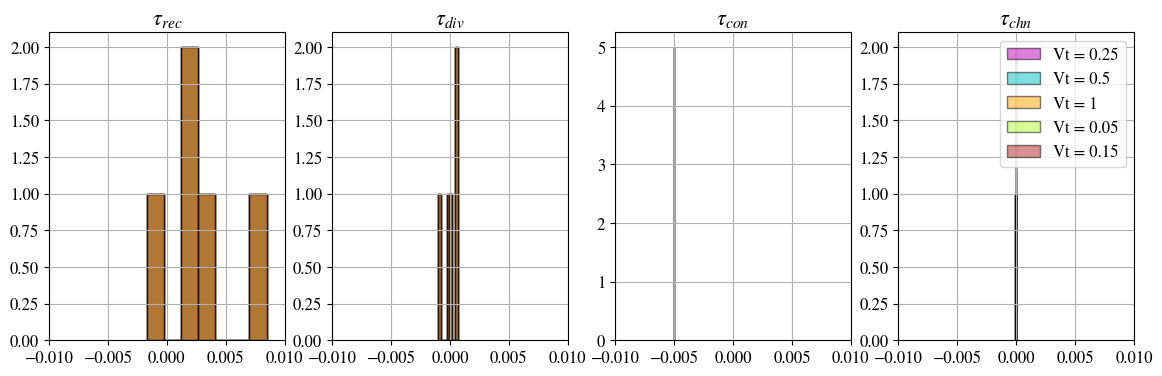

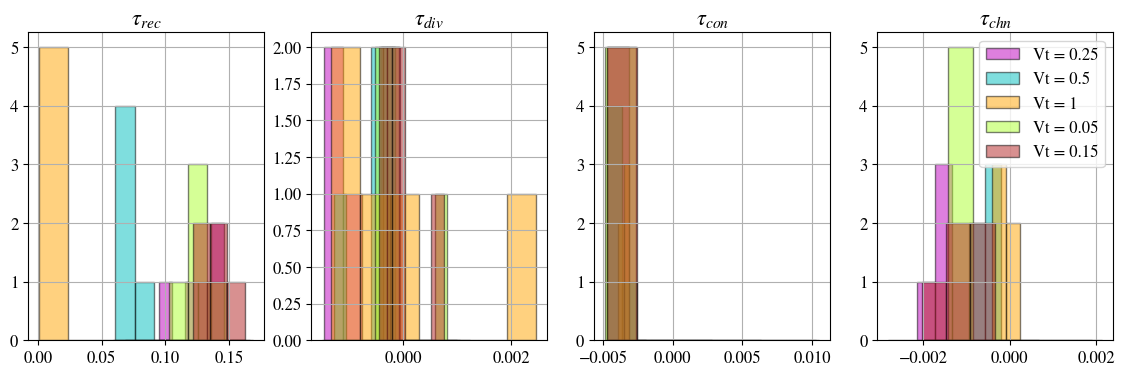

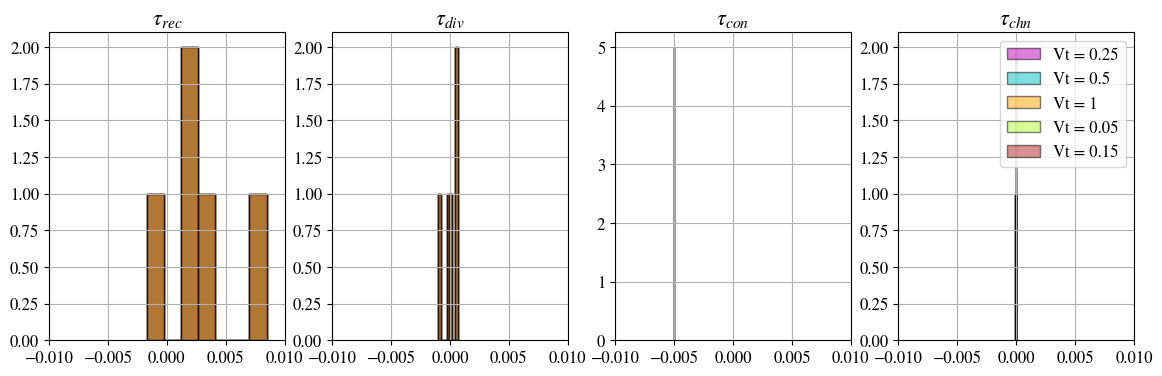

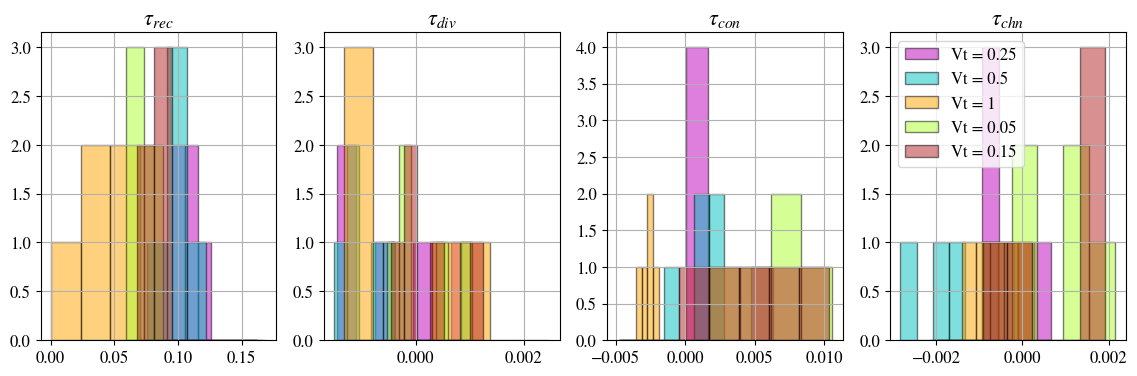

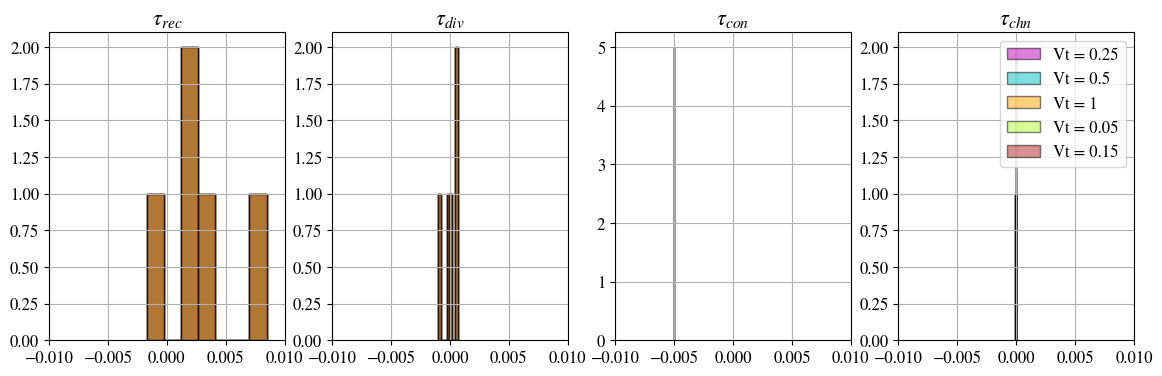

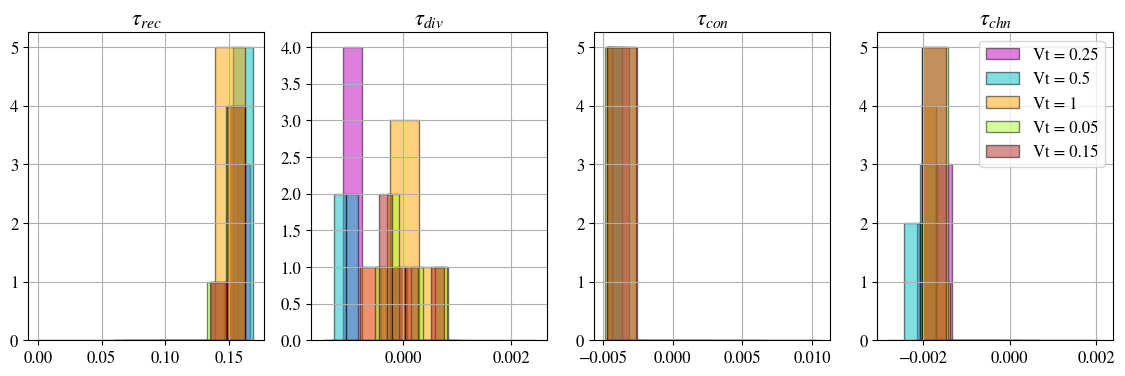

In [51]:
# Crear histogramas para cada columna de tau con nloop = 0
columns_tau = ['tau_rec', 'tau_div', 'tau_con', 'tau_chn']
columns_tau_latex = [r'$\tau_{rec}$', r'$\tau_{div}$', r'$\tau_{con}$', r'$\tau_{chn}$']



for pqif in [0, 0.5, 1]:
    for loop in [0, 15]:
        fig = plt.figure(figsize=(14, 4))

        for num_sim in num_sims:

            nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
            data = pd.read_csv(nombre_archivo)


            filename_parametros = f"simulacion_{num_sim}/simulacion_{num_sim}_parametros.csv"  # Reemplaza 'ruta/a/la/carpeta' con la ruta real de tu carpeta
            parametros = cargar_archivo_parametros(filename_parametros)

            nloop = parametros['nloop']

            color, label = color_label(num_sim)

            df_filtered = data[(data['nloop'] == loop)]

            for idx, column in enumerate(columns_tau):
                plt.subplot(1, 4, idx + 1)
                min_val = np.min(df_filtered[column])
                max_val = np.max(df_filtered[column])
            

                df_pqif = df_filtered[df_filtered['pqif'] == pqif]
                
                bins = np.linspace(min_val, max_val, 8)
                
                mean = np.mean(df_pqif[column])
                mean_formatted = f'{mean:.4f}'

                
                plt.hist(df_pqif[column], bins, edgecolor='black', color= color, label= label, alpha=0.5)

                plt.title(columns_tau_latex[idx])
                plt.grid()
                
                if loop == 0 :
                    plt.xlim(-0.01, 0.01)
        plt.legend()
        plt.show()

0 5
1 5
2 5
3 5
4 5
[0. 0. 0. ... 0. 0. 0.]
0 5
1 5
2 5
3 5
4 5
[0. 0. 0. ... 0. 0. 0.]
0 5
1 5
2 5
3 5
4 5
[0. 0. 0. ... 0. 0. 0.]
0 5
1 5
2 5
3 5
4 5
[0. 0. 0. ... 0. 0. 0.]
0 5
1 5
2 5
3 5
4 5
[0. 0. 0. ... 0. 0. 0.]


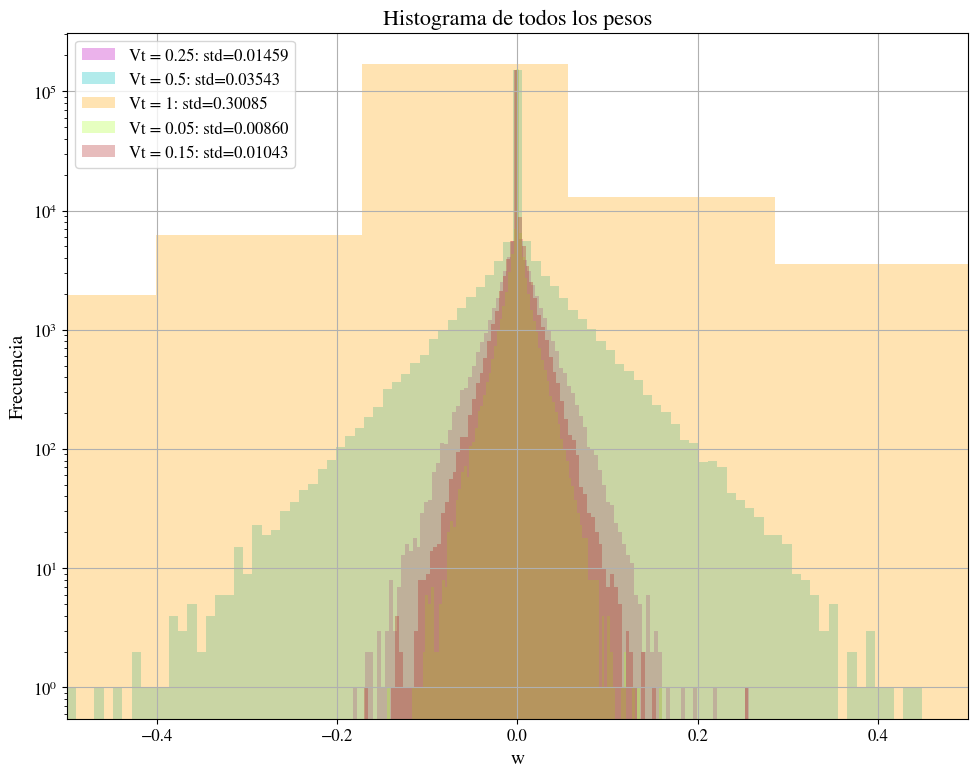

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))

for num_sim in num_sims:
    
    # Inicializar una lista para almacenar todos los pesos.
    todos_los_pesos = []
    color, label = color_label(num_sim)

    nombre_archivo = f'simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)


    filename_parametros = f"simulacion_{num_sim}/simulacion_{num_sim}_parametros.csv"  # Reemplaza 'ruta/a/la/carpeta' con la ruta real de tu carpeta
    parametros = cargar_archivo_parametros(filename_parametros)

    nloop = parametros['nloop']
    cant_seed = parametros['cant_seed']

    color, label = color_label(num_sim)

    df_filtered = data[(data['nloop'] == loop)]


    for k in range(cant_seed):
        print(k, cant_seed)
        # Leer la matriz desde el archivo CSV
        filename = f'simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_0_matriz_iloop_11_semilla_{k}'
        matrix = csv_to_matrix(filename)

        # Añadir todos los pesos de la matriz a la lista
        todos_los_pesos.extend(matrix.flatten())

    # Convertir la lista de pesos en un array de NumPy
    todos_los_pesos = np.array(todos_los_pesos)
    print(todos_los_pesos)
    # Calcular el histograma
    counts, bins = np.histogram(todos_los_pesos, bins=100)


    # Calcular la desviación estándar
    std = np.std(todos_los_pesos)
    text_x = 0.95
    text_y = 0.95
    #ax.text(text_x, text_y, f"{label}: std={std:.5f}", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=1))

    # Graficar el histograma
    ax.hist(bins[:-1], bins, weights=counts, alpha = 0.3, color = color,label = label+ f': std={std:.5f}')
  
    ax.set_title('Histograma de todos los pesos')
    ax.set_xlabel('w')
    ax.set_ylabel('Frecuencia')
    ax.set_yscale("log")
    # Calcular la desviación estándar

    ax.grid(True)
plt.legend(loc = 'upper left')
plt.xlim(-0.5,0.5)

plt.tight_layout()
plt.show()